# Лабораторная работа №3

## Условие

Вариант №14

Распределения:

$$\mathbf{X_1} \sim R(0, 10)$$
$$\mathbf{X_2} \sim N(5, 3)$$
$$\mathbf{X_3} \sim N(8, 1)$$

Объёмы выборок:

$$ n_1 = 100$$
$$ n_2 = 100$$
$$ n_3 = 150$$


## Импорты

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from scipy import stats
from time import time
from IPython.display import display, Markdown  # для вывода формул в консоль
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## Определения

In [15]:
a1, b1, n1 = 0, 10, 100
m2, std2, n2 = 5, 3, 100
m3, std3, n3 = 5, 3, 150

In [16]:
def mprint(*strings):
    for s in strings:
        display(Markdown(s))


np.random.seed(int(time()))
plt.rc("text", usetex=True)
plt.rc(
    "text.latex",
    preamble=r"""
\usepackage[english, russian]{babel}
\usepackage[utf8]{inputenc}
""",
)
plt.style.use("seaborn-v0_8")

In [17]:
alpha = 0.05


def verdict(alpha, p_value):
    if alpha > p_value:
        return "$H_0$ отклоняется"
    else:
        return "$H_0$ принимается"

### Характеристики наблюдаемых случайных величин

In [18]:
k = 3

X1 = np.random.uniform(a1,b1,n1)
X2 = np.random.normal(m2,std2,n2)
X3 = np.random.normal(m3,std3,n3)

X = [X1, X2, X3]
n = [n1, n2, n3]

mprint(f"$X_1$: {X1[:10].round(2)}")
mprint(f"$X_2$: {X2[:10].round(2)}")
mprint(f"$X_3$: {X3[:10].round(2)}")


$X_1$: [0.02 9.92 6.68 5.21 6.42 6.98 5.95 5.27 0.57 4.79]

$X_2$: [ 5.05  1.55  0.71  4.41  2.95  2.28  3.93  7.39 10.61  0.6 ]

$X_3$: [-0.82  0.53  3.08  6.39  7.88  5.19  0.5   8.58  6.76  6.93]

### Выборочные характеристики

In [53]:
mean1 = X1.mean()
S1 = X1.var(ddof=1)
s1 = X1.std(ddof=1)

mean2 = X2.mean()
S2 = X2.var(ddof=1)
s2 = X2.std(ddof=1)

mean3 = X3.mean()
S3 = X3.var(ddof=1)
s3 = X3.std(ddof=1)

X_pooled = np.concatenate(X)
n_pooled = sum(n)

mean_pooled = X_pooled.mean()
S_pooled = X_pooled.var(ddof=1)
s_pooled = X_pooled.std(ddof=1)

mprint(f"$\\overline{{x_1}} =$ {mean1:.2f}, $s_1^2 =$ {S1:.2f}, $s_1$ = {s1:.2f}")
mprint(f"$\\overline{{x_2}} =$ {mean2:.2f}, $s_2^2 =$ {S2:.2f}, $s_2$ = {s2:.2f}")
mprint(f"$\\overline{{x_3}} =$ {mean3:.2f}, $s_3^2 =$ {S3:.2f}, $s_3$ = {s3:.2f}")

mprint(
    f"$\\overline{{x_{{pooled}}}} =$ {mean_pooled:.2f}, $s_{{pooled}}^2 =$ {S_pooled:.2f}, $s_{{pooled}}$ = {s_pooled:.2f}"
)

$\overline{x_1} =$ 4.89, $s_1^2 =$ 9.73, $s_1$ = 3.12

$\overline{x_2} =$ 5.01, $s_2^2 =$ 8.22, $s_2$ = 2.87

$\overline{x_3} =$ 4.77, $s_3^2 =$ 10.34, $s_3$ = 3.22

$\overline{x_{pooled}} =$ 4.87, $s_{pooled}^2 =$ 9.52, $s_{pooled}$ = 3.09

## 2. Визуальное представление выборки

usetex = False


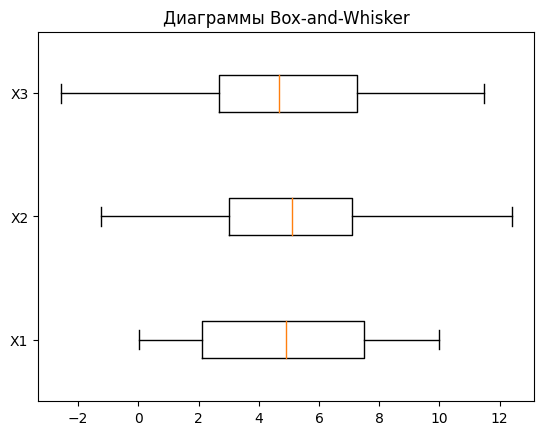

In [54]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# Сброс всех параметров к стандартным
mpl.rcParams.update(mpl.rcParamsDefault)

# Явно запрещаем использование внешнего LaTeX
mpl.rcParams["text.usetex"] = False

print("usetex =", mpl.rcParams["text.usetex"])




plt.boxplot(
    X,
    labels=["X1", "X2", "X3"],
    vert=False,                       # ориентация горизонтальная (ящики лежат вдоль оси X)
    boxprops=dict(color="black"),     # цвет рамки самих «ящиков» – чёрный
    whiskerprops=dict(color="black"), # цвет «усов» (линий от ящика до минимум/максимум)
    capprops=dict(color="black"),     # цвет «крышек» на концах усов
    flierprops=dict(markeredgecolor="black"), # цвет контура маркеров выбросов
)

plt.title("Диаграммы Box-and-Whisker")
plt.show()


## 3. Проверка условия применимости дисперсионного анализа

Статистическая гипотеза: $H_0: \sigma_1^2 = \sigma_2^2 = \sigma_3^2 $

In [30]:
z, p_value = stats.bartlett(X1, X2, X3)

mprint(
    r"### Bartlett’s test",
    f"$H_0: \\sigma_1^2 = \\sigma_2^2 = \\sigma_3^2 $",
    f"$z_{{выб}} =$ {z:.2f}",
    f"$p =$ {p_value:.2f}",
    verdict(alpha, p_value),
)

### Bartlett’s test

$H_0: \sigma_1^2 = \sigma_2^2 = \sigma_3^2 $

$z_{выб} =$ 1.56

$p =$ 0.46

$H_0$ принимается

## 4. Однофакторный дисперсионный анализ


Обозначим:
- $k$ — число групп;
- $n_i$ — объём $i$-й выборки;
- $n_{\text{pooled}} = \sum_{i=1}^{k} n_i$;
- $s_i^2$ — выборочная дисперсия в $i$-й группе.

Основные дисперсии:

$$
S_{\text{general}} = \operatorname{Var}(X_{\text{pooled}})
$$

$$
S_{\text{inside}} = \frac{1}{n_{\text{pooled}}} \sum_{i=1}^{k} n_i s_i^2
$$

$$
S_{\text{between}} = S_{\text{general}} - S_{\text{inside}}
$$

Несмещённые оценки:

$$
S_{\text{general}}^{(\text{unb})} =
S_{\text{general}} \cdot
\frac{n_{\text{pooled}}}{n_{\text{pooled}} - 1}
$$

$$
S_{\text{inside}}^{(\text{unb})} =
S_{\text{inside}} \cdot
\frac{n_{\text{pooled}}}{n_{\text{pooled}} - k}
$$

$$
S_{\text{between}}^{(\text{unb})} =
S_{\text{between}} \cdot
\frac{n_{\text{pooled}}}{k - 1}
$$


In [31]:
S_general = X_pooled.var()
S_inside = 1 / n_pooled * sum([n[i] * X[i].var() for i in range(k)])
S_between = S_general - S_inside

S_general_unbiased = S_general * n_pooled / (n_pooled - 1)
S_inside_unbiased = S_inside * n_pooled / (n_pooled - k)
S_between_unbiased = S_between * n_pooled / (k - 1)

mprint(
    f"$\\tilde{{D}}_{{\\text{{межгр}}}} = {S_between:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{внутр}}}} = {S_inside:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{общ}}}} = {S_general:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{межгр, несмещ}}}} = {S_between_unbiased:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{внутр, несмещ}}}} = {S_inside_unbiased:.2f}$",
    f"$\\tilde{{D}}_{{\\text{{общ, несмещ}}}} = {S_general_unbiased:.2f}$",
)

$\tilde{D}_{\text{межгр}} = 0.01$

$\tilde{D}_{\text{внутр}} = 9.48$

$\tilde{D}_{\text{общ}} = 9.49$

$\tilde{D}_{\text{межгр, несмещ}} = 1.77$

$\tilde{D}_{\text{внутр, несмещ}} = 9.56$

$\tilde{D}_{\text{общ, несмещ}} = 9.52$

In [32]:
eta_squared = S_between / S_general

eta = sqrt(eta_squared)

mprint(
    f"$\\tilde{{\\eta^2}} = {eta_squared:.2f}$",
    f"$\\tilde{{\\eta}} = {eta:.2f}$",
)

$\tilde{\eta^2} = 0.00$

$\tilde{\eta} = 0.03$

Эмпирирический коэффициент детерминации $\tilde{\eta^2} = \dfrac{\tilde{D}_{\text{межгр}}}{\tilde{D}_{\text{общ}}} = 0.00$

Эмпирическое корреляционное отношение $\tilde{\eta} = \sqrt{\tilde{\eta^2}} = 0.03$

Статистическая гипотеза: $H_0: m_1 = m_2 = m_3 $

- **межгрупповая дисперсия** (between) — разброс групповых средних;
- **внутригрупповая дисперсия** (inside/within) — средний разброс внутри групп.

Обозначим:

- $S_{\text{between}}$ — несмещённая межгрупповая дисперсия (соответствует $S_{\text{between\_unbiased}}$);
- $S_{\text{inside}}$ — несмещённая внутригрупповая дисперсия (соответствует $S_{\text{inside\_unbiased}}$).

F-статистика:

$$
F = \frac{S_{\text{between}}}{S_{\text{inside}}}
\sim F_{k-1,\; n_{\text{pooled}} - k}
\quad \text{при верной } H_0.
$$


In [36]:
z_value,p_value = stats.f_oneway(X1,X2,X3)

mprint(
    r"### ANOVA",
    f"$H_0: m_1 = m_2 = m_3 $",
    f"$z_{{выб}} = {z:.2f}$",
    f"$p = {p_value:.2f}$",
    verdict(alpha, p_value),
)

### ANOVA

$H_0: m_1 = m_2 = m_3 $

$z_{выб} = 1.56$

$p = 0.83$

$H_0$ принимается

## Метод линейных контрастов

### Доверительные интервалы для $m_1, \dots, m_k$

In [41]:
intervals = pd.DataFrame(index=["Нижняя граница", "Верхняя граница"])
for data, N, i in zip(X, n, range(1, k + 1)):
    std_err = stats.sem(data)
    intervals[f"X_{i}$"] = stats.t.interval(
        1-alpha,df = N-1, loc=np.mean(data),scale=std_err
    )

intervals

,X_1$,X_2$,X_3$
Нижняя граница,4.271771,4.441796,4.250089
Верхняя граница,5.509561,5.579568,5.287907


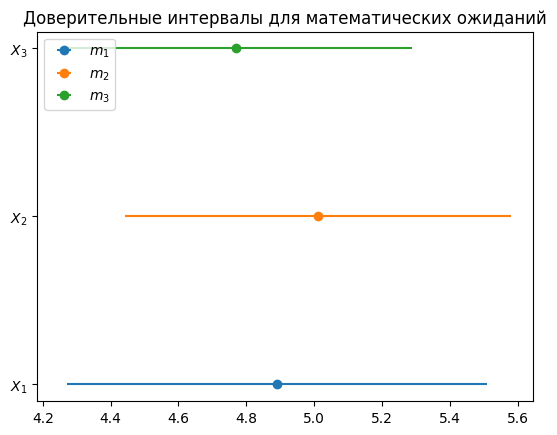

In [42]:
for interval, y in zip(intervals.columns, range(1, k + 1)):
    plt.errorbar(
        intervals[interval].mean(),
        y,
        xerr=(intervals[interval].mean() - intervals[interval].iloc[0]),
        fmt="o",
        label=f"$m_{y}$",
    )

plt.yticks(range(1, k + 1), [f"$X_{i}$" for i in range(1, k + 1)])
plt.legend(loc="upper left")
plt.title("Доверительные интервалы для математических ожиданий")
plt.show()

### Попарные сравнения $m_i$ и $m_j$

In [48]:
grouped = pd.DataFrame({"data": X_pooled, "group": np.repeat(range(1,k+1),n)})
grouped

,data,group
0,0.018472,1
1,9.919936,1
2,6.679147,1
3,5.205442,1
4,6.424713,1
...,...,...
345,5.399368,3
346,6.303330,3
347,6.412481,3
348,11.361814,3


В критерии Тьюки используется стандартная ошибка разности средних, в которой есть и общая дисперсия, и объёмы выборок.

### 1. Общая идея

Для двух групп \(i\) и \(j\) статистика имеет вид

$$
q_{ij} = \frac{\bigl|\bar X_i - \bar X_j\bigr|}
{\operatorname{SE}(\bar X_i - \bar X_j)},
$$




Нулевая гипотеза:

$H_0^{(ij)}:\ \mu_i = \mu_j$

Альтернативная гипотеза:

$H_1^{(ij)}:\ \mu_i \neq \mu_j$



In [50]:
result = pairwise_tukeyhsd(endog=grouped["data"], groups=grouped["group"], alpha=alpha)
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2     0.12 0.9593 -0.9094 1.1494  False
     1      3  -0.1217 0.9501 -1.0614  0.818  False
     2      3  -0.2417 0.8173 -1.1814  0.698  False
---------------------------------------------------


In [51]:
df = pd.DataFrame(
    data=result._results_table.data[1:],
    columns=[
        "m_i",
        "m_j",
        "z",
        "p-value",
        "lower",
        "upper",
        "Отклонение H_0",
    ],
)

df

,m_i,m_j,z,p-value,lower,upper,Отклонение H_0
0,1,2,0.1200,0.9593,-0.9094,1.1494,False
1,1,3,-0.1217,0.9501,-1.0614,0.8180,False
2,2,3,-0.2417,0.8173,-1.1814,0.6980,False
